## Aula Prática - IGTI Bootcamp Analista de Dados

### Importação das Bibliotecas que serão Ultilizadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Exemplo de Passo a Passo do K-Means

Criação do conjunto de dados ultilizado coo exemplo no passo a passo

In [5]:
dataset = np.array([[1,4],[2,2],[2,5],[3,3],[3,5],[4,7],[5,6],[6,4],[6,7],[7,6],[7,9],[8,7],[8,9],[9,4],[9,8]])

(0, 10)

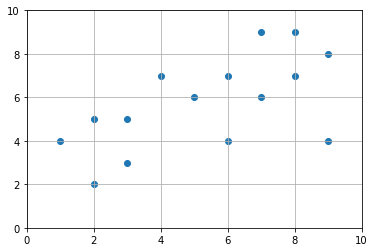

In [8]:
plt.grid()
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0, 10)
plt.ylim(0, 10)

Ultilizando a biblioteca KMeans, encontramos 3 clusters no conjunto de dados definido. O parâmetro ```init``` define a estratégia utilizada para inicialização dos centróides. O valor ```k-means++``` é um algoritmo interno da biblioteca para uma definição mais assertiva dos centróides, utilizando nesse algoritmo também o parâmetro ```n_init```

In [10]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dataset)

In [14]:
pred_y

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [12]:
kmeans.cluster_centers_

array([[6.16666667, 5.66666667],
       [8.        , 8.25      ],
       [2.2       , 3.8       ]])

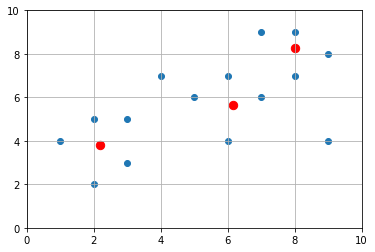

In [13]:
plt.grid()
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c="red")
plt.show()

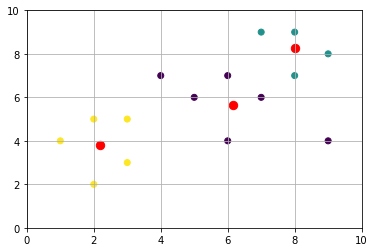

In [15]:
plt.grid()
plt.scatter(dataset[:,0], dataset[:,1], c=pred_y)
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c="red")
plt.show()

### Exemplo Com Dados Aleatórios

In [16]:
x, y = make_blobs(n_samples=500, centers=50, random_state=0)

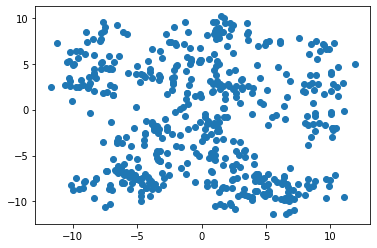

In [20]:
plt.scatter(x[:,0], x[:,1])

In [21]:
WCSS = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init=10, init="k-means++", random_state=0)
    kmeans.fit_predict(x)
    WCSS.append(kmeans.inertia_)

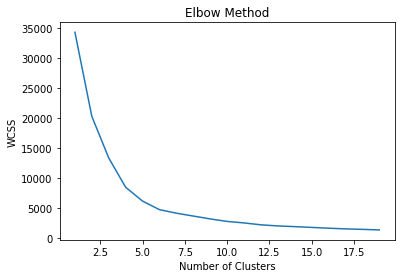

In [22]:
plt.plot(range(1,20), WCSS)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)

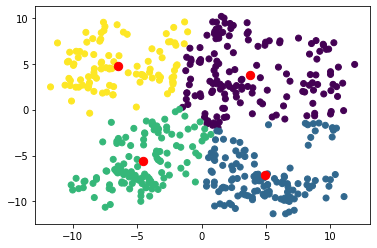

In [24]:
plt.scatter(x[:,0], x[:,1], c=pred_y)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c="red")
plt.show()